<a href="https://colab.research.google.com/github/shantanu1singh/ml-practice/blob/master/collab/Imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

## How to get review from indices

In [10]:
word_index = imdb.get_word_index()                                    
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])           
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])  # Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Converting reviews to a vector of the same size 10000

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))        
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          
    return results

x_train = vectorize_sequences(train_data)                  
x_test = vectorize_sequences(test_data)     

## Vectorize labels

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Build model layers

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Setting aside validation data

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Build model and monitor loss and accuracy by passing in the validation data

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 1s 45ms/step - loss: 0.5011 - accuracy: 0.7932 - val_loss: 0.4244 - val_accuracy: 0.8176
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2941 - accuracy: 0.9053 - val_loss: 0.3015 - val_accuracy: 0.8874
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2184 - accuracy: 0.9269 - val_loss: 0.2775 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1733 - accuracy: 0.9427 - val_loss: 0.3001 - val_accuracy: 0.8786
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1387 - accuracy: 0.9569 - val_loss: 0.2815 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1157 - accuracy: 0.9637 - val_loss: 0.3016 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0954 - accuracy: 0.9719 - val_loss: 0.3092 - val_accuracy: 0.8827
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plotting training and validation loss

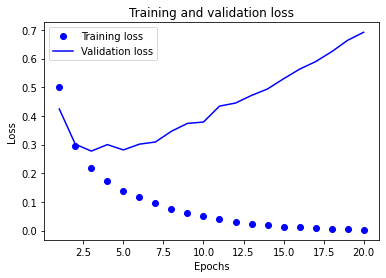

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Plotting training and validation accuracy

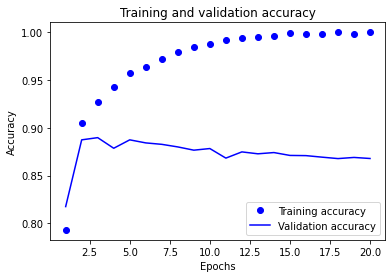

In [18]:
plt.clf()                                      
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# As the accuracy over training data increases but not over validation data, it implies overfitting.
# Action: Reduce number of epochs.

## Using 4 epochs

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

IndentationError: ignored

In [21]:
model.predict(x_test)

# Shows that model is confident for some reviews (whether they are positive or not) based on really high or really low probability, but not for others

array([[0.15762573],
       [0.9999304 ],
       [0.76649296],
       ...,
       [0.1066556 ],
       [0.06346583],
       [0.48602962]], dtype=float32)